In [50]:
import pandas as pd
import numpy as np

Getting the first five columns of the data

In [51]:
data = pd.read_csv('CSA-Data.csv')
data.head()

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


Checking the data types of each column

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   "Children are safe among family members such as grandparents, uncles, aunts, cousins"                   3002 non-null   object
 1   "Children are mainly abused by strangers in our society"                                                3002 non-null   object
 2   Male children dont need sexual abuse prevention knowledge                                               3002 non-null   object
 3   "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"  3002 non-null   object
 4   Do you know what child grooming is?                                                              

Checking any null values and how many they are.

In [53]:
data.isnull().sum()

"Children are safe among family members such as grandparents, uncles, aunts, cousins"                     0
"Children are mainly abused by strangers in our society"                                                  0
Male children dont need sexual abuse prevention knowledge                                                 0
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"    0
Do you know what child grooming is?                                                                       0
Do you know what signs to look for to identify if your child has been abused?                             0
Do you think children need post abuse counseling for recovering?                                          0
Do you think you should take legal action against the abuser of your child?                               0
Knowledge Level                                                                                           0
dtype: int64

I am going to use decision trees to check which question or statement contribute too much to sexual abuse, then people of any age group should be aware of it.

In [63]:
# Calculating the entropy of the target variable

def calc_entropy(labels):

    entropy = ...
    
    
    Pn =  (labels == 'beginner').sum() / len(labels)
    Py = (labels == 'Intermediate').sum() / len(labels)
    if Pn != 0:
        entropy = -Pn*np.log2(Pn)
    if Py != 0:
        entropy = -Py*np.log2(Py)
   

    return entropy



In [98]:
# Calculating the information gain of the target variable
def calc_information_gain(
    data, 
    feature, 
    target
):
  
    gain = ...
    # TODO
   
    target = data[target]
    feature = data[feature]
    feature_unique = feature.unique()
    D = len(target)
    D_features =[]
    H_D = calc_entropy(target)
   
    for i in feature_unique: 
        sum = 0
        for j in feature:
            if i == j:
                sum += 1
        D_features.append(sum)
   
    target_unique = target.unique()
    
    probabilites = []
   
 
    for f in feature.unique(): 
        index = 0
        prop = []
        for tar in target.unique():
            count = 0
            index_target = 0
            for i in range(len(target)):
                if feature[i] == f and target[i] == target_unique[index_target]:
                    count += 1
            index_target += 1
         
            prop.append(count/D_features[index])
        index += 1
             
           
        probabilites.append(prop)
        
    
    H_D_features = []
    for prop in probabilites:
        sum = 0
        for p in prop:
            if p != 0:
                sum += -p*np.log2(p)
        H_D_features.append(sum)
  
    sum = 0
    for i in range(len(H_D_features)):
        sum += (D_features[i])*H_D_features[i]
    gain = H_D -(1/D)*sum
    
    return gain

In [99]:
# Finding the best feature to split the data on

def find_best_feature(data, target):
    
    best_feature = ...
    
    target = data[target]
    features = data.columns
    features = features.drop(target.name)
    gains = []
    for feature in features:
        gain = calc_information_gain(data, feature, target.name)
        gains.append(gain)
    best_feature = features[np.argmax(gains)]
    return best_feature

WE'RE GOING TO TAKE THREE FACTORS THAT CONTRIBUTED MUCH ON THIS SURVEY, AND POSSIBLY CONTRIBUTED TOO MUCH TO SEXUAL ABUSE

In [67]:
# GETTING THE BEST THREE FEATURES
data_copy = data.copy()
best_features = []
for i in range(3):
    best_feature = find_best_feature(data_copy, 'Knowledge Level')
    best_features.append(best_feature)
    data_copy = data_copy.drop(best_feature, axis=1)

In [103]:
# How each knwledge level contributes to the best featurs
responses = []
for feature in best_features:
    response_counts = data.groupby(['Knowledge Level', feature]).size().unstack(fill_value=0)
    responses.append(response_counts)
responses_dicts = []
print("THE BEST THREE FEATURES ARE:")
print()
print("*********************************************************************************************")
for response in responses:
    print(response)
    responses_dicts.append(response.to_dict())
    print("*********************************************************************************************")


THE BEST THREE FEATURES ARE:

*********************************************************************************************
Do you think children need post abuse counseling for recovering?   No   Yes
Knowledge Level                                                            
Beginner                                                          621  1090
Intermediate                                                      270  1021
*********************************************************************************************
Do you know what signs to look for to identify if your child has been abused?    No  \
Knowledge Level                                                                       
Beginner                                                                       1277   
Intermediate                                                                    244   

Do you know what signs to look for to identify if your child has been abused?   Yes  
Knowledge Level                            

In [77]:
import matplotlib.pyplot as plt

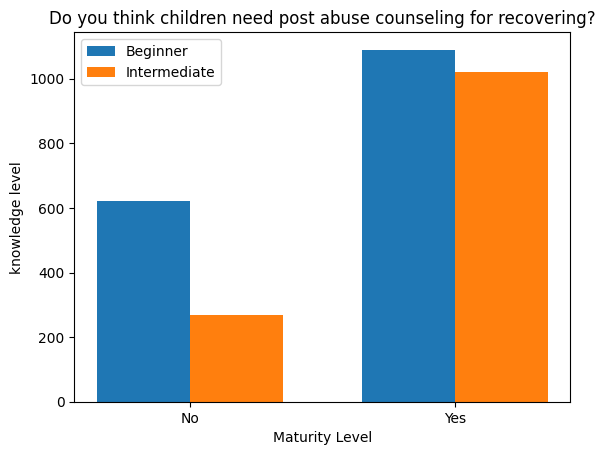

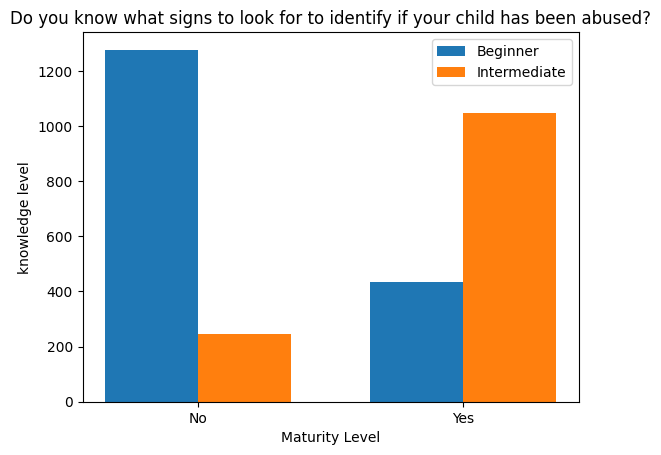

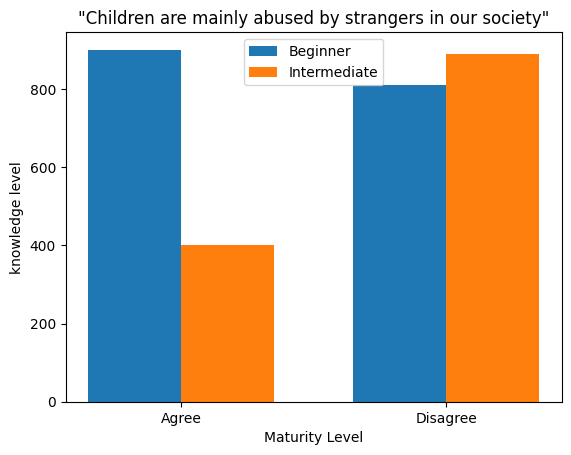

In [97]:
for graph in responses_dicts:
    labels = list(graph.keys())
    beginner = [graph[label]['Beginner'] for label in labels]
    intermediate = [graph[label]['Intermediate'] for label in labels]
    x = np.arange(len(labels))
    width = 0.35    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, beginner, width, label='Beginner')
    rects2 = ax.bar(x + width/2, intermediate, width, label="Intermediate") 
    ax.set_ylabel('knowledge level')
    ax.set_title(best_features[responses_dicts.index(graph)])
    ax.set_xlabel("Maturity Level")
    ax.legend()
    plt.xticks(x, labels)
    plt.show()


CONCLUSION

Looking at our second  graph we can see that beginners do not know when a person is being abused so it is unlikely for them to notice that they're being abused or someone around them is being abused.

As our graphs continue conflicting each other on who knows better.
Average shows that both classes need more lectures on this topic